## Assignment 4 (Intro to AI)

Marks total is 12: Question 7 is worth 6 marks and the other questions are weighted equally (1 mark each).

### Question 1: Dealing with data Pythonically

In [8]:
# You might find these packages useful. You may import any others you want!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1\. The file `"data/ads_dataset.tsv"` uses tabs instead of commas to separate fields. Load the data set `"data/ads_dataset.tsv"` into a Python `pandas` data frame called `ads`. If you are using the `read_csv()` function you will need to know that `"\t"` means tab when trying to set the delimeter.

In [9]:
# Place your code here
import pandas as pd
path = "data/ads_dataset.tsv"
ads = pd.read_csv(path,sep = '\t')
ads.head()

,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
NaN,0,NaN,1,0.0,0.0,0.0,0.0000,106,106,0,0,169,2130,0
NaN,0,NaN,1,0.0,0.0,0.0,0.0000,72,72,0,0,154,1100,0
NaN,0,NaN,1,0.0,0.0,0.0,0.0000,5,5,0,0,4,12,0
NaN,0,NaN,1,0.0,0.0,0.0,0.0000,6,6,0,0,150,539,0
NaN,0,NaN,2,0.0,0.5,0.0,-101.1493,101,101,0,1,103,362,0


2\. Write a Python function called `getDfSummary()` that does the following:
- Takes as input a data frame
- Creates a new data frame called `output_data` that:
  - Consists of the output of the `pandas` function `describe()`. (*Hint: Check the `pandas` [(manual page)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) for this function if you want to learn more.*)
  - The data frame `output_data` should have the original feature names from `input_data` as **rows**. (*Hint: Are they rows by default? If not, how could you make them rows?*)
  - Adds a column called `spread` that is the result of subtracting the `min` from the `max`. (*Hint: What does the `describe()` function return? Do we have a column called `max` and `min`?*)
- Returns the new `output_data` data frame.

In [10]:
import pandas as pd
import numpy as np

def getDfSummary(input_data):
    df = pd.DataFrame(input_data)
    describe = df.describe()
    dft = describe.T
    min = df.min()
    max = df.max()
    spread = np.subtract(max, min)
    output_data = pd.DataFrame(dft)
    output_data['spread'] = spread
    return output_data

3\. How long does it take for your `getDfSummary()` function to work on your `ads` data frame? Show us the results below.

*Hint: `%timeit getDfSummary(ads)`*

In [11]:
# Place your code here
from timeit import timeit
%timeit getDfSummary(ads)
#output = getDfSummary(ads)
#timeit('output','from __main__ import getDfSummary', number=1000)

193 ms ± 7.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


4\. Show the output of the `getDfSummary()` function you created.

In [12]:
# Place your code here
output = getDfSummary(ads)
print(output)

                       count        mean          std       min    25%    50%  \
isbuyer              54584.0    0.042632     0.202027    0.0000    0.0    0.0   
buy_freq              2327.0    1.240653     0.782228    1.0000    1.0    1.0   
visit_freq           54584.0    1.852777     2.921820    0.0000    1.0    1.0   
buy_interval         54584.0    0.210008     3.922016    0.0000    0.0    0.0   
sv_interval          54584.0    5.825610    17.595442    0.0000    0.0    0.0   
expected_time_buy    54584.0   -0.198040     4.997792 -181.9238    0.0    0.0   
expected_time_visit  54584.0  -10.210786    31.879722 -187.6156    0.0    0.0   
last_buy             54584.0   64.729335    53.476658    0.0000   18.0   51.0   
last_visit           54584.0   64.729335    53.476658    0.0000   18.0   51.0   
multiple_buy         54584.0    0.006357     0.079479    0.0000    0.0    0.0   
multiple_visit       54584.0    0.277444     0.447742    0.0000    0.0    0.0   
uniq_urls            54584.0

5\. Using the results returned from `getDfSummary()`, which fields, if any, have a spread of 1? Full credit will be given for a code based approach that prints out the correct field names. Partial credit will be given if you simply manually explore the results of `getDfSummary()`. Print each field name on a line by itself.

In [13]:
# Place your code here
sp = []
for i in output.index:
    if 1 in output.loc[i].values[:]:
        sp.append(i)
print(sp)

['isbuyer', 'buy_freq', 'visit_freq', 'multiple_buy', 'multiple_visit', 'num_checkins', 'y_buy']


6\. For the fields that have a spread of 1, what percentage of records have the value of `1`? You may assume that if a field had a spread of 1 that it only has values 1 and 0.

Full credit will be given for a code based approach that prints out the correct field names **and** their respective percentages. Partial credit will be given if you simply manually explore the results of `getDfSummary()`. (*Hint: Using the `pandas` function `.get_value()` may be useful if you happen to know the row and column name you want.*)

Your results should look something like this:

`The field` **`xxx`** `has` **`yyy`** `percent of its records set to 1.`

In [20]:
# Place your code here
for i in output.index:
    t = 0
    va = output.loc[i].values[:]
    for j in range(len(va)):
        if va[j] == 0 or va[j] == 1:
            t = t + 1
    print('The field %s has %f percent of its records set to 1.' % (i , t/9))

The field isbuyer has 0.666667 percent of its records set to 1.
The field buy_freq has 0.444444 percent of its records set to 1.
The field visit_freq has 0.333333 percent of its records set to 1.
The field buy_interval has 0.444444 percent of its records set to 1.
The field sv_interval has 0.333333 percent of its records set to 1.
The field expected_time_buy has 0.333333 percent of its records set to 1.
The field expected_time_visit has 0.333333 percent of its records set to 1.
The field last_buy has 0.111111 percent of its records set to 1.
The field last_visit has 0.111111 percent of its records set to 1.
The field multiple_buy has 0.666667 percent of its records set to 1.
The field multiple_visit has 0.666667 percent of its records set to 1.
The field uniq_urls has 0.000000 percent of its records set to 1.
The field num_checkins has 0.111111 percent of its records set to 1.
The field y_buy has 0.666667 percent of its records set to 1.


### Question 2. Functions, loops and plotting

1\. Write a function called `squared_less_100()` that takes a single number, squares it, and then returns the square minus 100.

In [1]:
def squared_less_100(input_number):
    output_number = input_number * input_number - 100  
    return output_number
print(squared_less_100(11))

21


2\. Create three empty lists called `sl1_results`, `absolute_results`, `log_results`.

In [2]:
sl1_results = []
absolute_results = []
log_results = []

3\. Create a list of integers from 1 to 20 (including both 1 and 20) called `original_set`. Loop through this list and apply your `squared_less_100()` function, the `numpy` function for finding absolute value, and the `numpy` natural log function. Store the result of each function by appending it the the initially empty lists you created in Part 4 Question 2. (*Hint: If you don't know what the `numpy` functions for absolute value or natural logs are, simply search online and it will be one of the first results. Although, you can probably guess what they would be!*)

In [3]:
# Code here!
import numpy as np
original_set = np.array(range(1,21)) 
print(original_set)
sl1_results = np.array(squared_less_100(original_set))
print(sl1_results)
absolute_results = np.abs(sl1_results)
print(absolute_results)
log_results = np.log(absolute_results)
print(log_results)

# Code here!

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[-99 -96 -91 -84 -75 -64 -51 -36 -19   0  21  44  69  96 125 156 189 224
 261 300]
[ 99  96  91  84  75  64  51  36  19   0  21  44  69  96 125 156 189 224
 261 300]
[4.59511985 4.56434819 4.51085951 4.4308168  4.31748811 4.15888308
 3.93182563 3.58351894 2.94443898       -inf 3.04452244 3.78418963
 4.2341065  4.56434819 4.82831374 5.04985601 5.24174702 5.41164605
 5.56452041 5.70378247]


C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


4\. Create a plot of your results. On the x-axis put `original_set`. Now, all within the **same plot** put a line for the `sl1_results`, a line for `absolute_results`, and a line for `log_results`. Don't forget to add a legend so that I know which line is for which set of results!

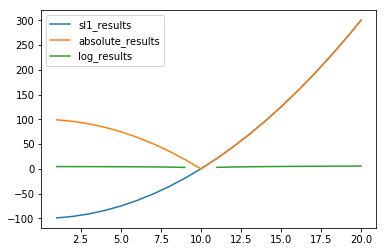

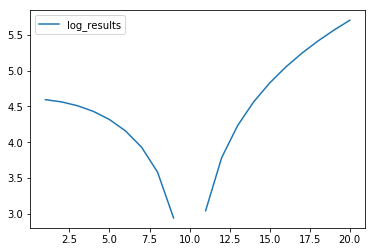

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(original_set, sl1_results, label = "sl1_results")
plt.plot(original_set, absolute_results, label = "absolute_results")
plt.plot(original_set, log_results, label = "log_results")
plt.legend()
plt.show()
plt.plot(original_set, log_results, label = "log_results")
plt.legend()
plt.show()
# Code here!

### Question 3. Modeling

For this example we will be using the data/cell2cell.csv data. We will practice modelling a problem looking at the likelyhood of customers leaving a company (see below). The idea of this question is to go through the main steps to implement a solution in sklearn and observe similarities in implementing different algorithms.

These historical data consist of 31,892 customers: 15,855 customers that churned (i.e., left the company) and 16,036 that did not churn. Here are the data set's 12 columns:

Col.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
12    churndep   Did the customer churn (1=Yes; 0=No)
The first 11 columns are our attributes/features. The last column, "churndep", is the target variable.

For this question apply any 3 machine learning algorithms that have covered in class (e.g. support vector machines, decision trees, logistic regression, nearest neighbour, neural network). Practice following the example and report your results for each algorithm in the form of:
(1) accuracy in correctly predicting churn
(2) a confusion matrix 

You can follow the template provided for coding. Notice we go through the same steps for each algorithm:
- load data
- create test and train data
- instantiate model
- train on training data examples
- test on out sample data
- review results


In [1]:
import itertools
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pylab as plt

%matplotlib inline

# Read in our csv data
data = pd.read_csv( 'data/cell2cell.csv' )

# Put all features into X and the target variable into Y
X = data.drop('churndep', axis = 1)
Y = data['churndep']


# Loop through your training percentages, split your data with each percentage, 
#  create both models, fit/train both models, predict with your models and 
#  append each accuracy to the correct list
#for training_percentage in training_percentages:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.5, random_state = 0 )

    
# Create all the models
model1 = DecisionTreeClassifier()
model2 = LogisticRegression(solver = 'liblinear')
model3 = SVC()

# Fit the models
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

# Fit all the models (Test)
Y_test_model1 = model1.predict(x_test)
Y_test_model2 = model2.predict(x_test)
Y_test_model3 = model3.predict(x_test)
    

# report results and validate

# Get the accuracy for the models' predictions
tree_acc = accuracy_score(Y_test_model1, y_test)
logistic_acc = accuracy_score(Y_test_model2, y_test)
svc_acc = accuracy_score(Y_test_model3, y_test)

# get the confusion matrix
tree = confusion_matrix(Y_test_model1, y_test)
logistic = confusion_matrix(Y_test_model2, y_test)
svc = confusion_matrix(Y_test_model3, y_test)

# print accuracy and confusion matrix in a nicely formatted table
classes = list(set(Y))
tick_marks = np.arange(len(classes))
print(tree, logistic, svc)

[[4348 3747]
 [3678 4173]] [[4861 3838]
 [3165 4082]] [[6186 5651]
 [1840 2269]]


### Question 4. Calculating Entropy and Information Gain

Calculate entropy and information gain.

1\. Consider this population. What is the entropy? 
<br /><img src="images/q5-1.png" height=140px width=142px style="float: left"/>

Put your answer here and working out. No working out = no mark. This question has no coding.

In [4]:
import numpy as np
p1 = 4/10
logp1 = np.log2(p1)
p2 = 6/10
logp2 = np.log2(p2)
entropy = -p1*logp1-p2*logp2
print(entropy)

0.9709505944546686


3\. Consider these possible splits at the top of a decision tree. Calculate the information gain obtained with Split A and Split B. Which split is better and why?
<br /><img src="images/q5-a.png" height=300px width=300px style="float: left; padding-right: 20px;"/> <img src="images/q5-b.png" height=300px width=300px style="float: left; padding-left: 20px"/>

Put your answer here and working out. No working out = no mark. This question has no coding.

In [12]:
import numpy as np
#Original
p1 = 4/15
logp1 = np.log2(p1)
p2 = 5/15
logp2 = np.log2(p2)
p3 = 6/15
logp3 = np.log2(p3)
entropy0 = -p1*logp1-p2*logp2-p3*logp3
print(entropy0)

1.565596230357602


In [18]:
#Split A
pa1 = 5/8
logpa1 = np.log2(pa1)
pa2 = 3/8
logpa2 = np.log2(pa2)
entropya1 = -pa1*logpa1-pa2*logpa2
pa3 = 1/7
logpa3 = np.log2(pa3)
pa4 = 1/7
logpa4 = np.log2(pa4)
pa5 = 5/7
logpa5 = np.log2(pa5)
entropya2 = -pa3*logpa3-pa4*logpa4-pa5*logpa5
entropya = entropya1 + entropya2 - entropy0 
print(entropya)

0.5376726268482797


In [19]:
#Split B
pb1 = 1
logpb1 = np.log2(pb1)
entropyb1 = -pb1*logpb1
pb2 = 4/9
logpb2 = np.log2(pb2)
pb3 = 5/9
logpb3 = np.log2(pb3)
entropyb2 = -pb2*logpb2-pb3*logpb3
entropyb = entropyb1 + entropyb2 - entropy0 
print(entropyb)

-0.5745201705193799


In [20]:
#Split B is better.

### Question 5. Learning Curves

For this example we will be using the `data/cell2cell.csv` data. It is a dataset to predict customer churn (chance of customer leaving a phone company) based on various inputs describing the customer and their usage of the service.

These historical data consist of 31,892 customers: 15,855 customers that churned (i.e., left the company) and 16,036 that did not churn. Here are the data set's 12 columns:

```
Col.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
12    churndep   Did the customer churn (1=Yes; 0=No)
```

The first 11 columns are our attributes/features. The last column, `"churndep"`, is the target variable.

Create a decision tree using entropy with no max depth and a logistic regression. 

In both cases assign 10% to 90% of the data to training (in increments of 10%) and the rest to test. 

For each training set,fit both models and then get the accuracy on the remaining data used for test. 

Lastly, create a plot:
Where the x-axis includes 0.10 to 0.90 (one tick for each training data percentage) and the y-axis indicates accuracy. Your plot should have two lines/curves on it: one for the decision tree and one for logistic regression. 

You can use the following code template.

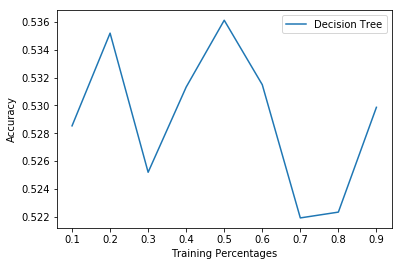

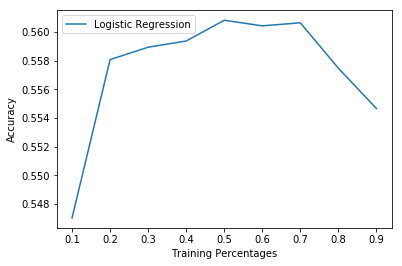

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
%matplotlib inline

# Read in our csv data
data = pd.read_csv( 'data/cell2cell.csv' )

# Put all features into X and the target variable into Y
X = data.drop( 'churndep', axis = 1 )
Y = data[ 'churndep' ]

# Prepare to do some training and testing
training_percentages = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]
tree_accuracies = []
logistic_accuracies = []

# Loop through your training percentages, split your data with each percentage, 
#  create both models, fit/train both models, predict with your models and 
#  append each accuracy to the correct list
for training_percentage in training_percentages:
    x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = training_percentage, random_state = 0 )
    
    # Create both models
    tree = DecisionTreeClassifier()
    logistic = LogisticRegression( solver='liblinear' )
    
    # Fit both models
    tree.fit( x_train, y_train )
    logistic.fit( x_train, y_train )
    
    # Get predictions from both models
    Y_test_predicted_tree = tree.predict( x_test )
    Y_test_predicted_logistic = logistic.predict( x_test )

    # Get the accuracy for the models' predictions
    tree_acc = accuracy_score( Y_test_predicted_tree, y_test )
    logistic_acc = accuracy_score( Y_test_predicted_logistic, y_test )
    
    # Now that I have a tree and logistic accuracy, I should add them to my list of accuracies
    tree_accuracies.append( tree_acc )
    logistic_accuracies.append( logistic_acc )

# Plot two curves on one plot. Don't forget labels and your legend
plt.plot( training_percentages, tree_accuracies, label = 'Decision Tree')
plt.legend()
plt.xlabel( "Training Percentages" )
plt.ylabel( "Accuracy" )
plt.show()

plt.plot( training_percentages, logistic_accuracies, label = 'Logistic Regression')
plt.legend()
plt.xlabel( "Training Percentages" )
plt.ylabel( "Accuracy" )
plt.show()

What type of plot is this?

Do you observe any interesting trends in the plot?

put your answer here.

### Question 6. Cross Validation, Fitting Curves

This question uses the same dataset as the previous question.

1. Review the below code which implements a decision and performs cross validation based on changing the max depth complexity parameter.

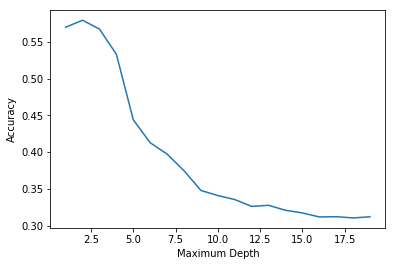

In [9]:
# Import pandas to read in data
import pandas as pd
import numpy as np

# Import matplotlib for plotting
import matplotlib.pylab as plt
%matplotlib inline

# Import decision trees and logistic regression
from sklearn.tree import DecisionTreeClassifier

# Import train, test, and evaluation functions
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

# Read data using pandas
data = pd.read_csv("data/cell2cell.csv")

# Split into X and Y
X = data.drop(['churndep'], 1)
Y = data['churndep']

# try maximum depths from 1 to 20
complexity_values = range(1,20)

# empty list to hold my accuracies
accuracies = []

# go through each complexity_value one at a time.
for complexity_value in complexity_values:
    # This will create an empty tree with a specific maximum depth (complexity)
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=complexity_value)
    
    # This will get us 10-fold cross validation accuracy with our tree and our data
    # We can do this in one line!
    cross_fold_accuracies = cross_val_score(tree, X, Y, scoring="accuracy", cv=10)
    
    # Average accuracy
    average_cross_fold_accuracy = np.mean(cross_fold_accuracies)
    
    # Append this accuracy to a list of accuracies
    accuracies.append(average_cross_fold_accuracy)

# We want to plot our results
plt.plot(complexity_values, accuracies)
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.show()

Given this analysis, what value would you set the decision tree max depth parameter to for new predictions and why?

In [29]:
 #answere here.
# I would set the decision tree max depth parameter at value 2 because its accuracy is the largest.

2\. Change the code above to perform a similar analysis with other measures of complexity: max leaf nodes, max features, etc. Select 3 parameters and produce 3 charts showing the performance.

In [ ]:
#Put your answer here. (step 1 - copy the code from the previous question).
# Import pandas to read in data
import pandas as pd
import numpy as np

# Import matplotlib for plotting
import matplotlib.pylab as plt
%matplotlib inline

# Import decision trees and logistic regression
from sklearn.tree import DecisionTreeClassifier

# Import train, test, and evaluation functions
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

# Read data using pandas
data = pd.read_csv("data/cell2cell.csv")

# Split into X and Y
X = data.drop(['churndep'], 1)
Y = data['churndep']

# try maximum depths from 1 to 20
complexity_values = range(1,20)

# empty list to hold my accuracies
accuracies = []
maxleafnodes = []
maxfeatures = []

# go through each complexity_value one at a time.
for complexity_value in complexity_values:
    # This will create an empty tree with a specific maximum depth (complexity)
    tree1 = DecisionTreeClassifier(criterion="entropy", max_depth=complexity_value)
    tree2 = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=complexity_value)
    tree3 = DecisionTreeClassifier(criterion="entropy", max_features=complexity_value)
    # This will get us 10-fold cross validation accuracy with our tree and our data
    # We can do this in one line!
    cross_fold_accuracies1 = cross_val_score(tree1, X, Y, scoring="accuracy", cv=10)
    cross_fold_accuracies2 = cross_val_score(tree2, X, Y, scoring="accuracy", cv=10)
    cross_fold_accuracies3 = cross_val_score(tree3, X, Y, scoring="accuracy", cv=10)
    
    # Average accuracy
    average_cross_fold_accuracy1 = np.mean(cross_fold_accuracies1)
    average_cross_fold_accuracy2 = np.mean(cross_fold_accuracies2)
    average_cross_fold_accuracy3 = np.mean(cross_fold_accuracies3)
    
    # Append this accuracy to a list of accuracies
    accuracies.append(average_cross_fold_accuracy1)
    maxleafnodes.append(average_cross_fold_accuracy2)
    maxfeatures.append(average_cross_fold_accuracy3)

# We want to plot our results
plt.plot(complexity_values, accuracies, label = 'Maximum Depth')
plt.plot(complexity_values, maxleafnodes, label = 'Max Leaf Nodes')
plt.plot(complexity_values, maxfeatures, label = 'Max Features')
plt.xlabel("Complexity Values")
plt.ylabel("Accuracy")
plt.show()

### Question 7. Implement 3 algorithms and optimise parameters

3\. This question requires you to implement additional machine learning methods and improve the performance of the decision tree we analysed in the last question. Look at nearest neighbour, logistic regression (see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), and support vector machine (see https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html).

Produce graphs showing the accuracy performance for different regularisation strengths - C parameter- in logistic regression and SVM. For nearest neighbours examine the value of k.

In [11]:
#your code here. Grading based on correct implementation and approach as well as improving the previous result. 
# you need to use cross validation and accuracy to measure the performance (as in the previous example) and try to change 
#different appropriate parameters...

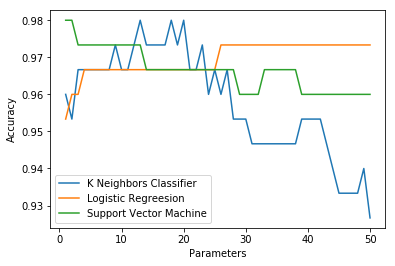

In [46]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
%matplotlib inline

X, Y = load_iris( return_X_y = True )

parameters = range( 1, 51 )

KNeighborsClassifieraccuracies = []
LogisticRegressionaccuracies = []
SVMaccuracies = []

for parameter in parameters :
    knc = KNeighborsClassifier( n_neighbors = parameter )
    lr = LogisticRegression(solver = 'liblinear', C = parameter )
    svm = SVC( C = parameter )
    
    cross_fold_accuracies1 = cross_val_score( knc, X, Y, scoring = 'accuracy', cv = 10 )
    cross_fold_accuracies2 = cross_val_score( lr, X, Y, scoring = 'accuracy', cv = 10 )
    cross_fold_accuracies3 = cross_val_score( svm, X, Y, scoring = 'accuracy', cv = 10 )
    
    average_cross_fold_accuracy1 = np.mean( cross_fold_accuracies1 )
    average_cross_fold_accuracy2 = np.mean( cross_fold_accuracies2 )
    average_cross_fold_accuracy3 = np.mean( cross_fold_accuracies3 )
    
    KNeighborsClassifieraccuracies.append( average_cross_fold_accuracy1 )
    LogisticRegressionaccuracies.append( average_cross_fold_accuracy2 )
    SVMaccuracies.append( average_cross_fold_accuracy3 )

plt.plot( parameters, KNeighborsClassifieraccuracies, label = 'K Neighbors Classifier')
plt.xlabel( 'Parameters' )
plt.ylabel( 'Accuracy' )
plt.legend()
#plt.show()
plt.plot( parameters, LogisticRegressionaccuracies, label = 'Logistic Regreesion' )
plt.xlabel( 'Parameters' )
plt.ylabel( 'Accuracy' )
plt.legend()
#plt.show()
plt.plot( parameters, SVMaccuracies, label = 'Support Vector Machine')
plt.xlabel( 'Parameters' )
plt.ylabel( 'Accuracy' )
plt.legend()
plt.show()
